In [1]:
import pandas as pd
import pickle
from pycaret.regression import *
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
data = pd.read_csv(r"C:\Users\VamsiMuramreddy\Desktop\Dimond\dataset.csv")

In [3]:
data.head()

,SI.NO,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.isnull().sum()

SI.NO      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.dtypes

SI.NO        int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
for col in data.select_dtypes(include="object").columns:
    data[col] = le.fit_transform(data[col])

In [8]:
data.dtypes

SI.NO        int64
carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [9]:
data.drop(['SI.NO'], axis =1, inplace =True)

In [10]:
reg = setup(data = data, target = 'price')

,Description,Value
0,Session id,7944
1,Target,price
2,Target type,Regression
3,Data shape,"(53940, 10)"
4,Train data shape,"(37757, 10)"
5,Test data shape,"(16183, 10)"
6,Numeric features,9
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [11]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,278.4129,289657.1328,538.0248,0.9818,0.1015,0.0759,5.1230
et,Extra Trees Regressor,272.8658,304572.3005,551.6451,0.9809,0.0931,0.0667,4.0400
lightgbm,Light Gradient Boosting Machine,289.0155,306447.9491,553.3169,0.9808,0.1098,0.0842,0.3860
xgboost,Extreme Gradient Boosting,284.3258,314095.2817,560.1878,0.9803,0.0998,0.0735,1.2200
rf,Random Forest Regressor,278.2921,317838.4912,563.3926,0.9801,0.0935,0.0665,4.8380
gbr,Gradient Boosting Regressor,372.8548,464122.1284,680.8078,0.9709,0.1655,0.1148,1.4080
dt,Decision Tree Regressor,373.8140,584322.8314,763.9137,0.9633,0.1286,0.0883,0.1060
knn,K Neighbors Regressor,504.2090,901438.8637,948.6833,0.9435,0.1854,0.1415,0.1940
ada,AdaBoost Regressor,1030.9770,1807389.5673,1343.9539,0.8865,0.4474,0.4889,0.8960
lasso,Lasso Regression,863.8561,1961042.4024,1392.7414,0.8770,0.6065,0.3816,0.0570


In [12]:
best

In [13]:
cbr = create_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,275.8695,285272.1281,534.1087,0.9821,0.0999,0.0758
1,291.9352,305629.0548,552.8373,0.9814,0.0999,0.0765
2,271.1018,293087.1844,541.3753,0.9816,0.0980,0.0744
3,274.8826,281937.3584,530.9777,0.9822,0.0997,0.0756
4,278.1039,280197.4911,529.3368,0.9828,0.1028,0.0759
5,279.8973,298142.3080,546.0241,0.9809,0.1055,0.0749
6,264.6585,260875.4471,510.7597,0.9825,0.0998,0.0751
7,290.4696,314778.1114,561.0509,0.9818,0.1051,0.0771
8,282.5298,297713.4383,545.6312,0.9814,0.1032,0.0767


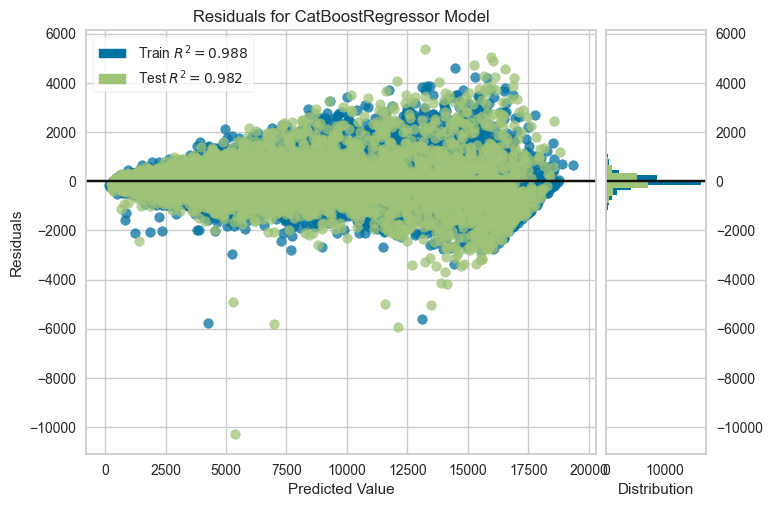

In [14]:
plot_model(cbr)

In [16]:
with open("model.pkl", 'wb') as p:
     pickle.dump(best,p)

In [17]:
pf = open('model.pkl', 'rb')
lp = pickle.load(pf)

In [18]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [19]:
lp.predict([[0.21,3,1,2,59.8,61.0,3.89,3.84,2.31]])

array([330.01243044])